In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


In [2]:
# Create dataset dictionary
data = {
    "Brand": [
        "UNIQLO","UNIQLO","UNIQLO","UNIQLO",
        "TK Maxx","TK Maxx","TK Maxx","TK Maxx"
    ],
    
    "Year": [
        2021,2022,2023,2024,
        2021,2022,2023,2024
    ],
    
    "Region": [
        "Europe","Asia","North America","Europe",
        "Europe","Asia","North America","Europe"
    ],
    
    "Sales_Revenue_Million": [
        21000,24000,26500,28000,
        18000,19500,20500,22000
    ],
    
    "Profit_Million": [
        3200,3900,4200,4600,
        2500,2700,2950,3100
    ],
    
    "Customer_Age_Group": [
        "18-25","26-35","36-50","18-25",
        "26-35","36-50","18-25","50+"
    ],
    
    "Gender": [
        "Female","Male","Female","Male",
        "Female","Male","Female","Male"
    ],
    
    "Income_Level": [
        "Low","Medium","High","Medium",
        "Medium","High","Low","Medium"
    ],
    
    "Customer_Count": [
        1200000,1500000,1400000,1600000,
        1100000,1300000,1250000,1350000
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

df


,Brand,Year,Region,Sales_Revenue_Million,Profit_Million,Customer_Age_Group,Gender,Income_Level,Customer_Count
0,UNIQLO,2021,Europe,21000,3200,18-25,Female,Low,1200000
1,UNIQLO,2022,Asia,24000,3900,26-35,Male,Medium,1500000
2,UNIQLO,2023,North America,26500,4200,36-50,Female,High,1400000
3,UNIQLO,2024,Europe,28000,4600,18-25,Male,Medium,1600000
4,TK Maxx,2021,Europe,18000,2500,26-35,Female,Medium,1100000
5,TK Maxx,2022,Asia,19500,2700,36-50,Male,High,1300000
6,TK Maxx,2023,North America,20500,2950,18-25,Female,Low,1250000
7,TK Maxx,2024,Europe,22000,3100,50+,Male,Medium,1350000


In [3]:
df["Profit_Margin_%"] = (df["Profit_Million"] / df["Sales_Revenue_Million"]) * 100

df


,Brand,Year,Region,Sales_Revenue_Million,Profit_Million,Customer_Age_Group,Gender,Income_Level,Customer_Count,Profit_Margin_%
0,UNIQLO,2021,Europe,21000,3200,18-25,Female,Low,1200000,15.238095
1,UNIQLO,2022,Asia,24000,3900,26-35,Male,Medium,1500000,16.250000
2,UNIQLO,2023,North America,26500,4200,36-50,Female,High,1400000,15.849057
3,UNIQLO,2024,Europe,28000,4600,18-25,Male,Medium,1600000,16.428571
4,TK Maxx,2021,Europe,18000,2500,26-35,Female,Medium,1100000,13.888889
5,TK Maxx,2022,Asia,19500,2700,36-50,Male,High,1300000,13.846154
6,TK Maxx,2023,North America,20500,2950,18-25,Female,Low,1250000,14.390244
7,TK Maxx,2024,Europe,22000,3100,50+,Male,Medium,1350000,14.090909


In [4]:
# Check missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Check data types
print(df.dtypes)


Brand                    0
Year                     0
Region                   0
Sales_Revenue_Million    0
Profit_Million           0
Customer_Age_Group       0
Gender                   0
Income_Level             0
Customer_Count           0
Profit_Margin_%          0
dtype: int64
Brand                     object
Year                       int64
Region                    object
Sales_Revenue_Million      int64
Profit_Million             int64
Customer_Age_Group        object
Gender                    object
Income_Level              object
Customer_Count             int64
Profit_Margin_%          float64
dtype: object


In [5]:
sales_by_brand = df.groupby("Brand")["Sales_Revenue_Million"].sum()

print(sales_by_brand)


Brand
TK Maxx    80000
UNIQLO     99500
Name: Sales_Revenue_Million, dtype: int64


In [6]:
profit_margin = df.groupby("Brand")["Profit_Margin_%"].mean()

print(profit_margin)


Brand
TK Maxx    14.054049
UNIQLO     15.941431
Name: Profit_Margin_%, dtype: float64


In [7]:
demo = df.groupby(["Brand","Customer_Age_Group"])["Customer_Count"].sum()

print(demo)


Brand    Customer_Age_Group
TK Maxx  18-25                 1250000
         26-35                 1100000
         36-50                 1300000
         50+                   1350000
UNIQLO   18-25                 2800000
         26-35                 1500000
         36-50                 1400000
Name: Customer_Count, dtype: int64


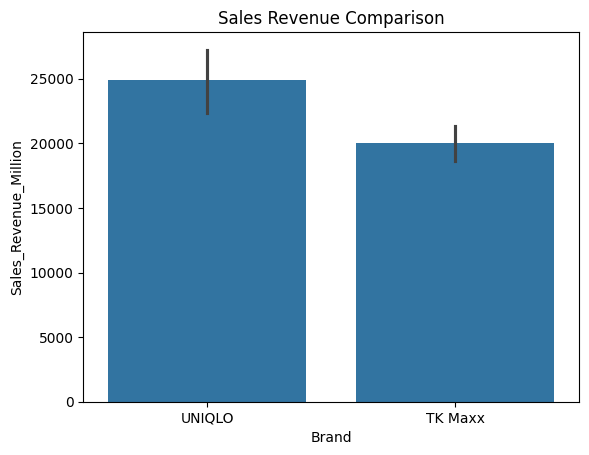

In [8]:
sns.barplot(data=df, x="Brand", y="Sales_Revenue_Million")
plt.title("Sales Revenue Comparison")
plt.show()


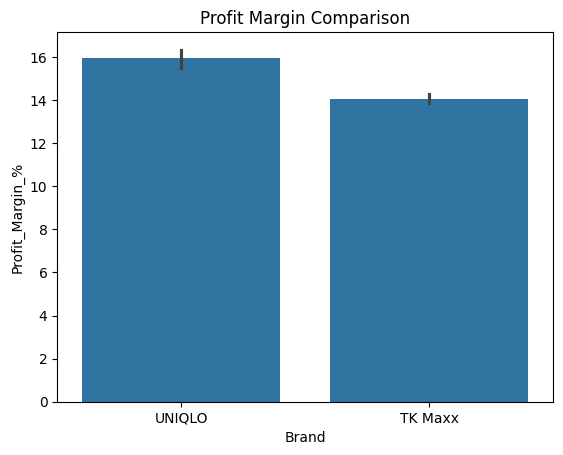

In [9]:
sns.barplot(data=df, x="Brand", y="Profit_Margin_%")
plt.title("Profit Margin Comparison")
plt.show()


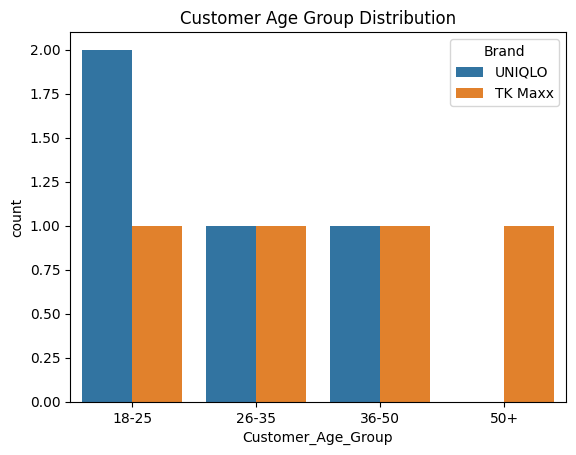

In [10]:
sns.countplot(data=df, x="Customer_Age_Group", hue="Brand")
plt.title("Customer Age Group Distribution")
plt.show()


In [11]:
df.to_csv("uniqlo_tkmaxx_dataset.csv", index=False)


In [12]:
df.to_excel("uniqlo_tkmaxx_dataset.xlsx", index=False)


In [13]:
df = pd.read_csv("uniqlo_tkmaxx_dataset.csv")

df.head()


,Brand,Year,Region,Sales_Revenue_Million,Profit_Million,Customer_Age_Group,Gender,Income_Level,Customer_Count,Profit_Margin_%
0,UNIQLO,2021,Europe,21000,3200,18-25,Female,Low,1200000,15.238095
1,UNIQLO,2022,Asia,24000,3900,26-35,Male,Medium,1500000,16.250000
2,UNIQLO,2023,North America,26500,4200,36-50,Female,High,1400000,15.849057
3,UNIQLO,2024,Europe,28000,4600,18-25,Male,Medium,1600000,16.428571
4,TK Maxx,2021,Europe,18000,2500,26-35,Female,Medium,1100000,13.888889


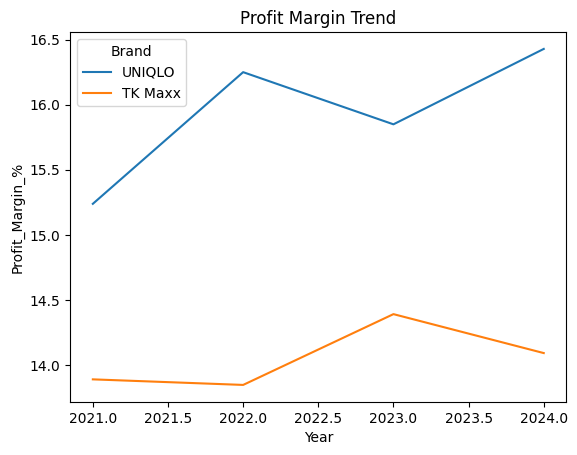

In [14]:
sns.lineplot(data=df, x="Year", y="Profit_Margin_%", hue="Brand")
plt.title("Profit Margin Trend")
plt.show()
